In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
class CustomLungDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.images = self.load_images()
        #print("1")

    def load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            class_idx = self.class_to_idx[class_name]
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                images.append((img_path, class_idx))
        #print("2")
        return images

    def __len__(self):
        #print("3")
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        #print("4")
        return image, label

In [3]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [4]:
lung_dataset = CustomLungDataset(root_dir='Data/train', transform=data_transform)


In [5]:
lung_dataloader = DataLoader(lung_dataset, batch_size=32, shuffle=True)

In [26]:
print(f"Number of classes: {len(lung_dataset.classes)}")
print(f"Class names: {lung_dataset.classes}")
print(f"Number of images: {len(lung_dataset)}")

sample_image, sample_label = lung_dataset[0]
print(f"Sample Image Shape: {sample_image.shape}, Label: {sample_label}")

Number of classes: 4
Class names: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
Number of images: 613
Sample Image Shape: torch.Size([3, 224, 224]), Label: 0


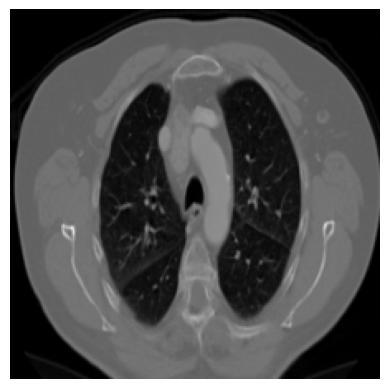

In [27]:
sample_image = sample_image.permute(1, 2, 0).numpy()
plt.imshow(sample_image)
plt.axis('off')
plt.show()